Топ-15 регионов по количеству вакансий:
region_name
Москва                   46708
Санкт-Петербург          13420
Московская область        7098
Краснодарский край        4257
Свердловская область      4122
Алматы                    3496
Нижегородская область     3494
Ростовская область        3446
Новосибирская область     3260
Республика Татарстан      3223
Самарская область         2540
Красноярский край         1930
Челябинская область       1869
Минск                     1863
Воронежская область       1820
Name: count, dtype: int64


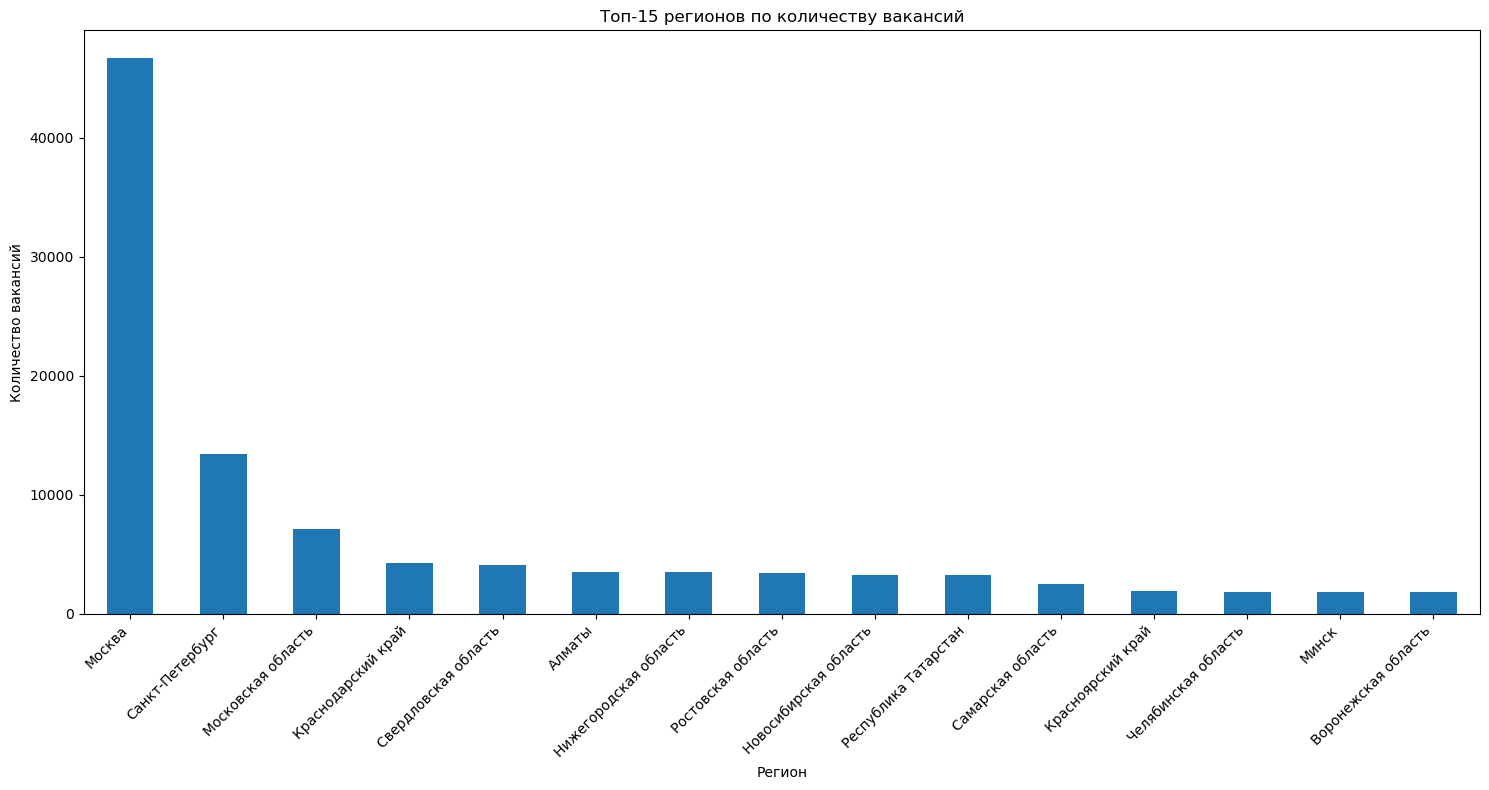


Статистика по зарплатам в регионах (топ-15 по средней зарплате):
                          количество_вакансий  средняя_зп  медианная_зп  \
region_name                                                               
Москва                                  27521    80248.10       70000.0   
Сахалинская область                       337    79753.28       74600.0   
Санкт-Петербург                         10155    64622.39       55000.0   
Камчатский край                           144    62272.26       60000.0   
Ямало-Ненецкий АО                         372    61045.17       55000.0   
Приморский край                           951    59547.81       50000.0   
Республика Саха (Якутия)                  180    56404.78       50000.0   
Хабаровский край                          749    55930.82       50000.0   
Астана                                   1175    54451.20       40576.0   
Московская область                       6444    52720.20       50000.0   
Новосибирская область             

C:\Users\gopan\AppData\Local\Temp\ipykernel_20344\1321436589.py:56: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




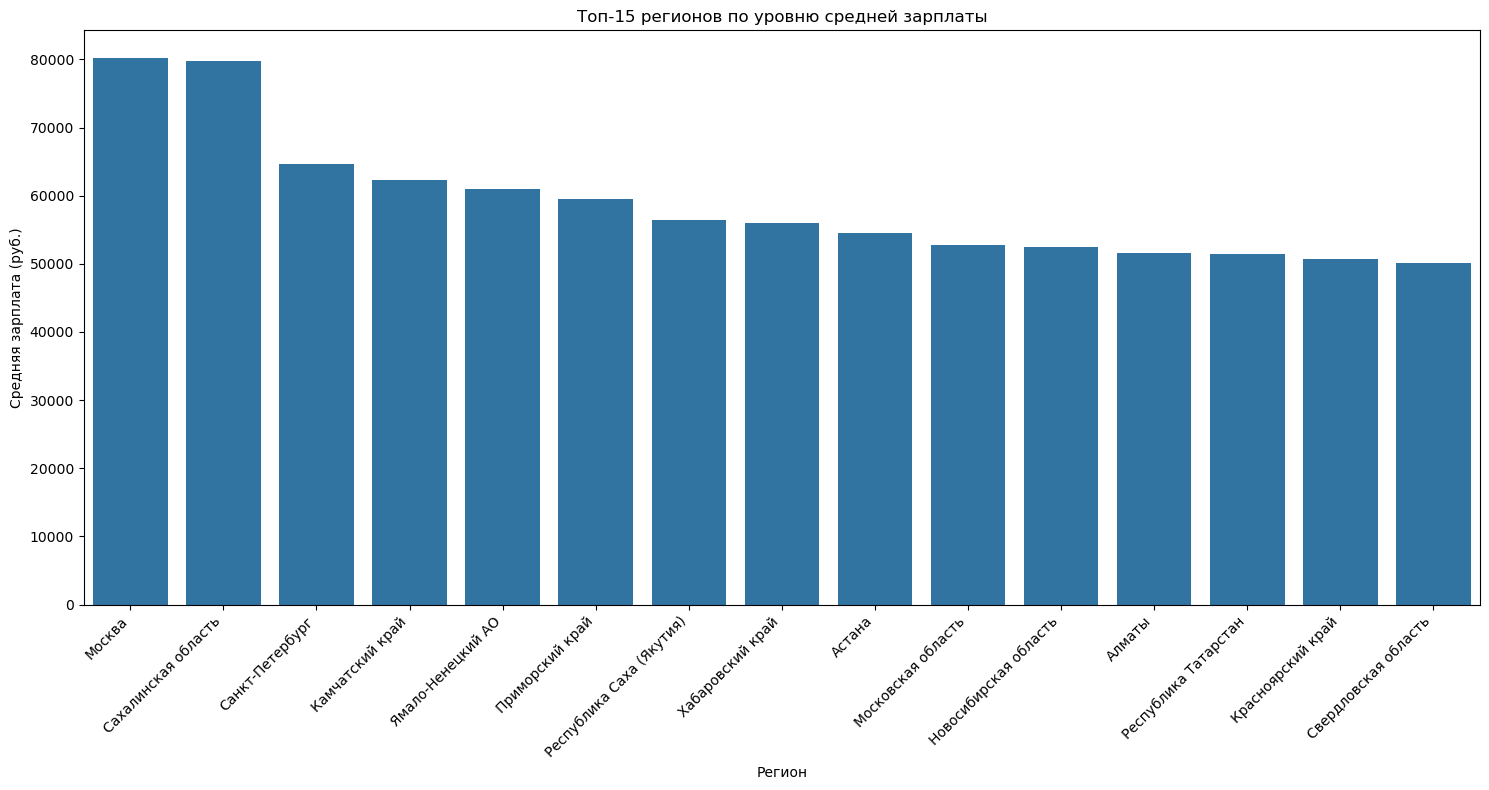


Статистика по федеральным округам:
                      количество_вакансий  средняя_зп  медианная_зп  \
region_district_name                                                  
Центральный                         44212    67675.83       57500.0   
Северо-Западный                     14523    57999.81       50000.0   
Дальневосточный                      3251    57114.22       50000.0   
Уральский                            7981    48601.10       41166.0   
Южный                                9258    47459.56       40000.0   
Сибирский                            9052    47419.85       40000.0   
Приволжский                         17092    46188.06       40000.0   
Северо-Кавказский                    1198    39623.00       32000.0   

                      стандартное_отклонение  
region_district_name                          
Центральный                         73432.95  
Северо-Западный                     41917.56  
Дальневосточный                     33131.27  
Уральский         

C:\Users\gopan\AppData\Local\Temp\ipykernel_20344\1321436589.py:80: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




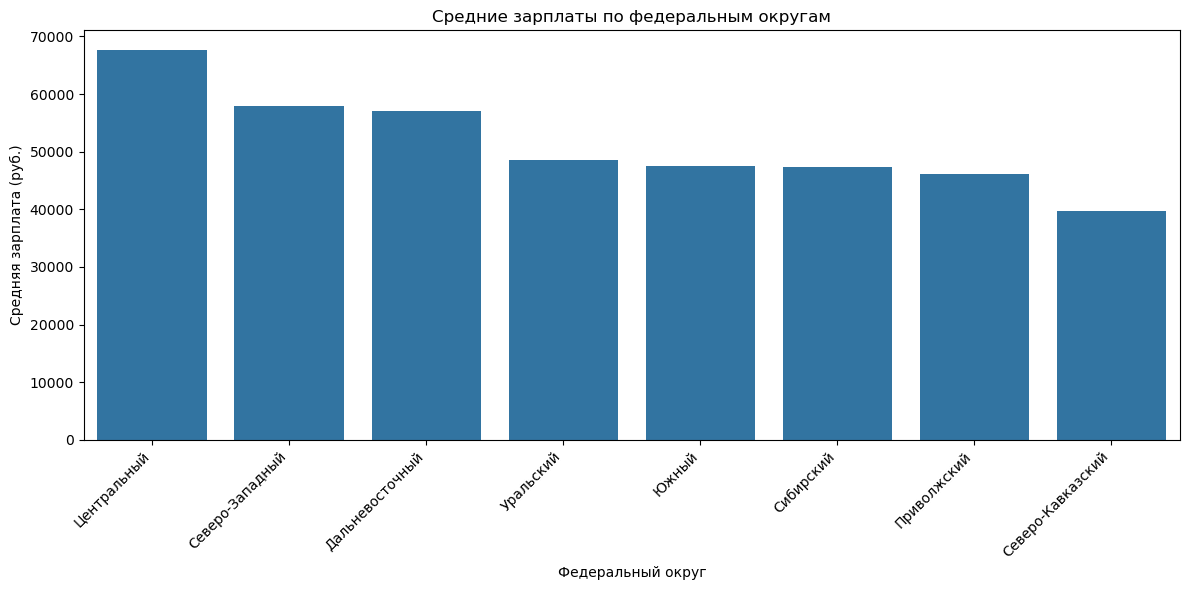


Общая статистика:
Всего регионов с вакансиями: 221
Регионов с достаточным количеством вакансий (≥100): 78
Федеральных округов: 8

Дисперсия зарплат:
Общая дисперсия зарплат: 61983.11
Межрегиональная дисперсия средних зарплат: 8432.49


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('hh.zip', encoding='utf-8-sig')
# Настройка отображения русских символов в matplotlib
plt.rcParams['font.family'] = 'DejaVu Sans'

# 1. Подготовка данных по зарплатам
def calculate_avg_salary(row):
    """Рассчитывает среднюю зарплату из from и to значений"""
    if row['salary_from'] > 0 and row['salary_to'] > 0:
        return (row['salary_from'] + row['salary_to']) / 2
    elif row['salary_from'] > 0:
        return row['salary_from']
    elif row['salary_to'] > 0:
        return row['salary_to']
    return np.nan

# Рассчитываем среднюю зарплату
df['avg_salary'] = df.apply(calculate_avg_salary, axis=1)

# 2. Анализ распределения вакансий по регионам
vacancies_by_region = df['region_name'].value_counts()

print("Топ-15 регионов по количеству вакансий:")
print(vacancies_by_region.head(15))

# Визуализация распределения вакансий
plt.figure(figsize=(15, 8))
vacancies_by_region.head(15).plot(kind='bar')
plt.title('Топ-15 регионов по количеству вакансий')
plt.xlabel('Регион')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Анализ уровня зарплат по регионам
# Расчет статистик по зарплатам для каждого региона
salary_stats = df.groupby('region_name').agg({
    'avg_salary': ['count', 'mean', 'median', 'std'],
    'region_district_name': 'first'  # добавляем федеральный округ
}).round(2)

salary_stats.columns = ['количество_вакансий', 'средняя_зп', 'медианная_зп', 'стандартное_отклонение', 'федеральный_округ']

# Фильтруем регионы с достаточным количеством вакансий (минимум 100)
significant_regions = salary_stats[salary_stats['количество_вакансий'] >= 100].sort_values('средняя_зп', ascending=False)

print("\nСтатистика по зарплатам в регионах (топ-15 по средней зарплате):")
print(significant_regions.head(15))

# Визуализация зарплат по регионам
plt.figure(figsize=(15, 8))
sns.barplot(data=significant_regions.head(15).reset_index(), 
            x='region_name', 
            y='средняя_зп',
            ci=None)
plt.title('Топ-15 регионов по уровню средней зарплаты')
plt.xlabel('Регион')
plt.ylabel('Средняя зарплата (руб.)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Анализ зарплат по федеральным округам
district_stats = df.groupby('region_district_name').agg({
    'avg_salary': ['count', 'mean', 'median', 'std']
}).round(2)

district_stats.columns = ['количество_вакансий', 'средняя_зп', 'медианная_зп', 'стандартное_отклонение']
district_stats = district_stats.sort_values('средняя_зп', ascending=False)

print("\nСтатистика по федеральным округам:")
print(district_stats)

# Визуализация зарплат по федеральным округам
plt.figure(figsize=(12, 6))
sns.barplot(data=district_stats.reset_index(), 
            x='region_district_name', 
            y='средняя_зп',
            ci=None)
plt.title('Средние зарплаты по федеральным округам')
plt.xlabel('Федеральный округ')
plt.ylabel('Средняя зарплата (руб.)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Сохранение результатов анализа
# Создаем словарь с результатами анализа
analysis_results = {
    'regional_distribution': vacancies_by_region.to_dict(),
    'salary_statistics': significant_regions.to_dict(),
    'district_statistics': district_stats.to_dict()
}

# Сохраняем детальные результаты в Excel
with pd.ExcelWriter('geographic_analysis.xlsx') as writer:
    vacancies_by_region.to_frame('количество_вакансий').to_excel(writer, sheet_name='Распределение_вакансий')
    significant_regions.to_excel(writer, sheet_name='Статистика_по_регионам')
    district_stats.to_excel(writer, sheet_name='Статистика_по_округам')


# 6. Дополнительная информация
print("\nОбщая статистика:")
print(f"Всего регионов с вакансиями: {len(vacancies_by_region)}")
print(f"Регионов с достаточным количеством вакансий (≥100): {len(significant_regions)}")
print(f"Федеральных округов: {len(district_stats)}")

# Расчет дисперсии зарплат
print("\nДисперсия зарплат:")
print(f"Общая дисперсия зарплат: {df['avg_salary'].std():.2f}")
print(f"Межрегиональная дисперсия средних зарплат: {significant_regions['средняя_зп'].std():.2f}")



Топ-5 регионов по доле в общем количестве вакансий:
region_name
Москва                  31.32
Санкт-Петербург          9.00
Московская область       4.76
Краснодарский край       2.85
Свердловская область     2.76
Name: count, dtype: float64

Топ-5 регионов по доле в общем объеме средней зарплаты:
region_name
Москва                  34.42
Санкт-Петербург         10.23
Московская область       5.29
Свердловская область     2.80
Краснодарский край       2.80
dtype: float64


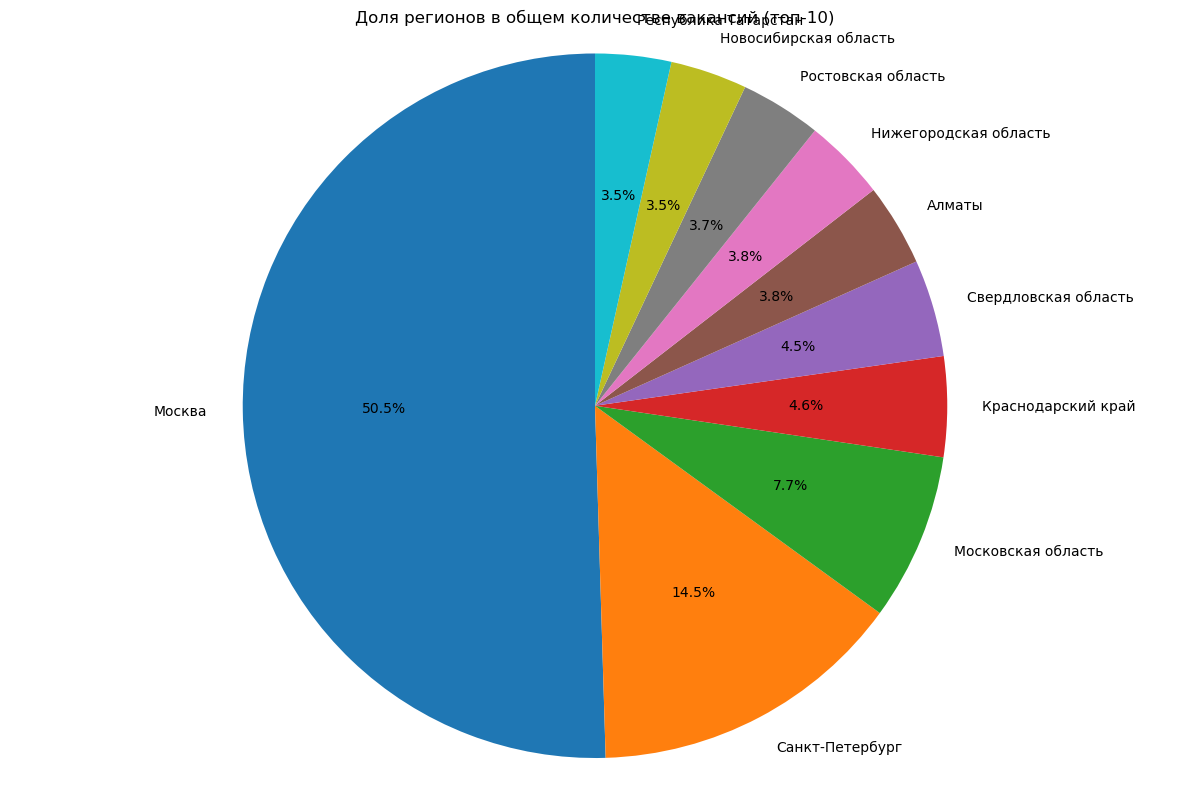

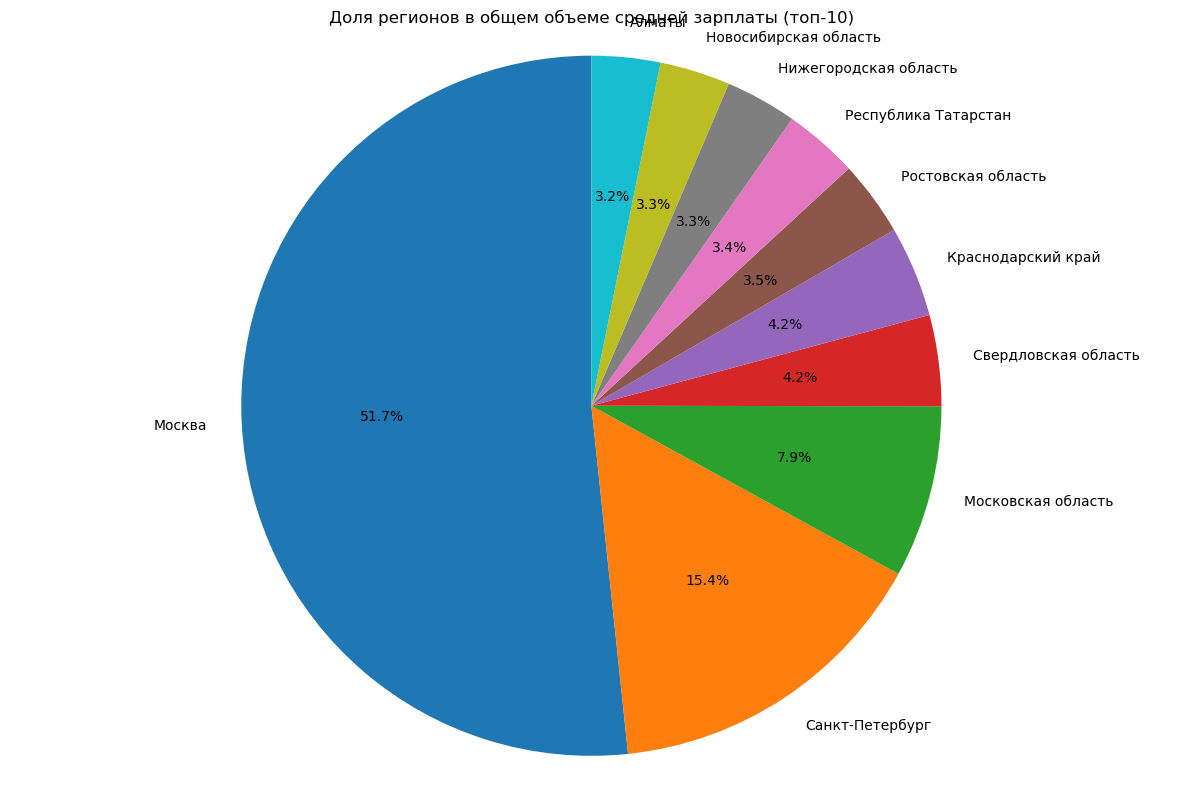

In [35]:
# Расчет долей регионов в общем количестве вакансий
total_vacancies = vacancies_by_region.sum()
region_vacancy_shares = (vacancies_by_region / total_vacancies * 100).sort_values(ascending=False)

# Расчет долей регионов в общем объеме средней зарплаты
total_salary_volume = (significant_regions['средняя_зп'] * significant_regions['количество_вакансий']).sum()
region_salary_shares = (significant_regions['средняя_зп'] * significant_regions['количество_вакансий'] / total_salary_volume * 100).sort_values(ascending=False)




# Вывод числовых значений для топ-5 регионов
print("\nТоп-5 регионов по доле в общем количестве вакансий:")
print(region_vacancy_shares.head().round(2))

print("\nТоп-5 регионов по доле в общем объеме средней зарплаты:")
print(region_salary_shares.head().round(2))


# Создание круговой диаграммы для доли вакансий по регионам
plt.figure(figsize=(12, 8))
plt.pie(region_vacancy_shares.head(10), 
        labels=region_vacancy_shares.head(10).index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Доля регионов в общем количестве вакансий (топ-10)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Создание круговой диаграммы для доли в общем объеме зарплат
plt.figure(figsize=(12, 8))
plt.pie(region_salary_shares.head(10),
        labels=region_salary_shares.head(10).index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Доля регионов в общем объеме средней зарплаты (топ-10)')
plt.axis('equal')
plt.tight_layout()
plt.show()






In [62]:
df['region_name'].tail(50)

149760          Чеченская республика
149761             Иркутская область
149762                       Ташкент
149763                        Москва
149764              Амурская область
149765                        Москва
149766                        Москва
149767            Курганская область
149768       Республика Башкортостан
149769                        Алматы
149770                      Кокшетау
149771            Московская область
149772                        Москва
149773         Нижегородская область
149774    Ханты-Мансийский АО - Югра
149775                        Москва
149776          Владимирская область
149777                        Москва
149778              Тульская область
149779             Орловская область
149780          Свердловская область
149781            Московская область
149782         Архангельская область
149783                         Минск
149784          Владимирская область
149785                        Москва
149786                        Москва
1

In [37]:
# Агрегация по регионам
# Считаем количество вакансий (размер группы) и среднюю зарплату
aggregated_data = df.groupby('region_name').agg(
    количество_вакансий=('region_name', 'size'), # Считаем количество строк в каждой группе
    средняя_зарплата=('avg_salary', 'mean')    # Вычисляем среднее для столбца 'avg_salary'
).reset_index()

print("Агрегированные данные по регионам:")
print(aggregated_data)

Агрегированные данные по регионам:
             region_name  количество_вакансий  средняя_зарплата
0               Аккурган                    1      24470.500000
1      Аксай (Казахстан)                    5      32846.400000
2    Аксу (Павлодар.обл)                    3      22968.000000
3                  Актау                   85      30507.548611
4     Акташ (Узбекистан)                    1      33361.000000
..                   ...                  ...               ...
216              Шымкент                  239      39170.219697
217            Экибастуз                    8      20862.500000
218    Ямало-Ненецкий АО                  434      61045.165323
219              Янгиюль                    1               NaN
220  Ярославская область                 1079      41701.312306

[221 rows x 3 columns]


In [71]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Создаем словарь с координатами городов
city_coordinates = {
    'Москва': {'latitude': 55.7558, 'longitude': 37.6173},
    'Санкт-Петербург': {'latitude': 59.9375, 'longitude': 30.3086},
    'Новосибирская область': {'latitude': 55.0084, 'longitude': 82.9357},
    'Свердловская область': {'latitude': 56.8389, 'longitude': 60.6057},
    'Нижегородская область': {'latitude': 56.3269, 'longitude': 44.0059},
    'Краснодарский край': {'latitude': 45.0448, 'longitude': 38.9760},
    'Челябинская область': {'latitude': 55.1644, 'longitude': 61.4368},
    'Самарская область': {'latitude': 53.1959, 'longitude': 50.1002},
    'Ростовская область': {'latitude': 47.2357, 'longitude': 39.7015},
    'Омская область': {'latitude': 54.9924, 'longitude': 73.3686},
    'Красноярский край': {'latitude': 56.0184, 'longitude': 92.8672},
    'Воронежская область': {'latitude': 51.6720, 'longitude': 39.1843},
    'Пермский край': {'latitude': 58.0105, 'longitude': 56.2294},
    'Республика Татарстан': {'latitude': 55.7887, 'longitude': 49.1221}
}

# Добавляем координаты к данным
aggregated_data['latitude'] = aggregated_data['region_name'].map(lambda x: city_coordinates.get(x, {}).get('latitude'))
aggregated_data['longitude'] = aggregated_data['region_name'].map(lambda x: city_coordinates.get(x, {}).get('longitude'))



# Создаем карту с помощью plotly
fig = px.scatter_mapbox(
    aggregated_data.dropna(subset=['latitude', 'longitude']),  # Удаляем строки с отсутствующими координатами
    lat='latitude',
    lon='longitude',
    hover_name='region_name',
    hover_data={
        'количество_вакансий': True,
        'средняя_зарплата': True,
        'latitude': False,
        'longitude': False
    },
    size='количество_вакансий',
    color='средняя_зарплата',
    color_continuous_scale='Viridis',
    zoom=3,
    mapbox_style='carto-positron',
    title='Распределение вакансий и зарплат по городам'
)

fig.update_layout(
    margin={"r":0,"t":30,"l":0,"b":0},
    height=800,
    width=1200
)

fig.show()



In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import folium
from folium.plugins import HeatMap

# Создаем словарь с координатами городов
city_coordinates = {
    'Москва': {'latitude': 55.7558, 'longitude': 37.6173},
    'Санкт-Петербург': {'latitude': 59.9375, 'longitude': 30.3086},
    'Новосибирская область': {'latitude': 55.0084, 'longitude': 82.9357},
    'Свердловская область': {'latitude': 56.8389, 'longitude': 60.6057},
    'Нижегородская область': {'latitude': 56.3269, 'longitude': 44.0059},
    'Краснодарский край': {'latitude': 45.0448, 'longitude': 38.9760},
    'Челябинская область': {'latitude': 55.1644, 'longitude': 61.4368},
    'Самарская область': {'latitude': 53.1959, 'longitude': 50.1002},
    'Ростовская область': {'latitude': 47.2357, 'longitude': 39.7015},
    'Омская область': {'latitude': 54.9924, 'longitude': 73.3686},
    'Красноярский край': {'latitude': 56.0184, 'longitude': 92.8672},
    'Воронежская область': {'latitude': 51.6720, 'longitude': 39.1843},
    'Пермский край': {'latitude': 58.0105, 'longitude': 56.2294},
    'Республика Татарстан': {'latitude': 55.7887, 'longitude': 49.1221}
}

# Добавляем координаты к данным
aggregated_data['latitude'] = aggregated_data['region_name'].map(lambda x: city_coordinates.get(x, {}).get('latitude'))
aggregated_data['longitude'] = aggregated_data['region_name'].map(lambda x: city_coordinates.get(x, {}).get('longitude'))

# Создаем базовую карту с центром в России
m = folium.Map(location=[65, 97], zoom_start=3)

# Создаем список данных для тепловой карты
heat_data = []
for _, row in aggregated_data.iterrows():
    if pd.notna(row['latitude']) and pd.notna(row['longitude']):
        # Нормализуем размер точки в зависимости от количества вакансий
        weight = row['количество_вакансий'] / aggregated_data['количество_вакансий'].max()
        heat_data.append([row['latitude'], row['longitude'], weight])

# Добавляем тепловую карту
HeatMap(heat_data).add_to(m)

# Добавляем маркеры для каждого города
for _, row in aggregated_data.iterrows():
    if pd.notna(row['latitude']) and pd.notna(row['longitude']):
        popup_text = f"""
        Регион: {row['region_name']}<br>
        Количество вакансий: {row['количество_вакансий']}<br>
        Средняя зарплата: {row['средняя_зарплата']:.2f} руб.
        """
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=10,
            popup=folium.Popup(popup_text, max_width=300),
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7
        ).add_to(m)

m

